In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
df_filename = '../cruft/om-2023-12-22-2024-02-07-melb1.csv'
era_filename = '../cruft/20231222-era5.nc'
graphcast_filename = '../cruft/pred/2m.nc'

In [3]:
df = pd.read_csv(df_filename)
df = df[df['date'].str.contains('00:00:00|06:00:00|12:00:00|18:00:00')]
df = df[df['date'] < '2024-01-01 12:00:00']
df = df[df['date'] > '2023-12-22 06:00:00']


In [4]:
dataset = xr.open_dataset(era_filename)
selected_data = dataset.sel(latitude=-37.814, longitude=144.9633, method='nearest')
t2m = selected_data.t2m.values.flatten()[:-1]
df['era5_2m'] = t2m - 273.15

/home/ubuntu/ai-models-graphcast/venv/lib/python3.10/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.30.0
  warnings.warn(


In [5]:
gc = xr.open_dataset(graphcast_filename)
gc = gc.sel(latitude=-37.814, longitude=144.9633, method='nearest')
df['gc_2m'] = gc['t2m'].values.flatten() - 273.15


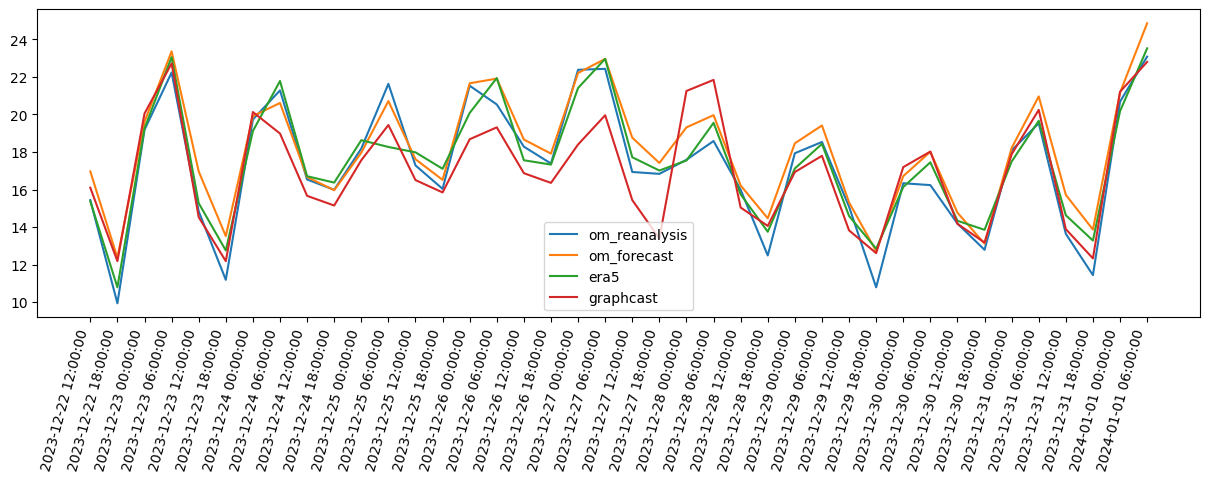

In [6]:
plt.figure(figsize=(15,4))

plt.plot(df['date'], df['temperature_2m_reanalysis'])
plt.plot(df['date'], df['temperature_2m_forcast'])
plt.plot(df['date'], df['era5_2m'])
plt.plot(df['date'], df['gc_2m'])
plt.xticks(rotation=75, ha='right')
plt.legend(['om_reanalysis', 'om_forecast', 'era5', 'graphcast'])
print()

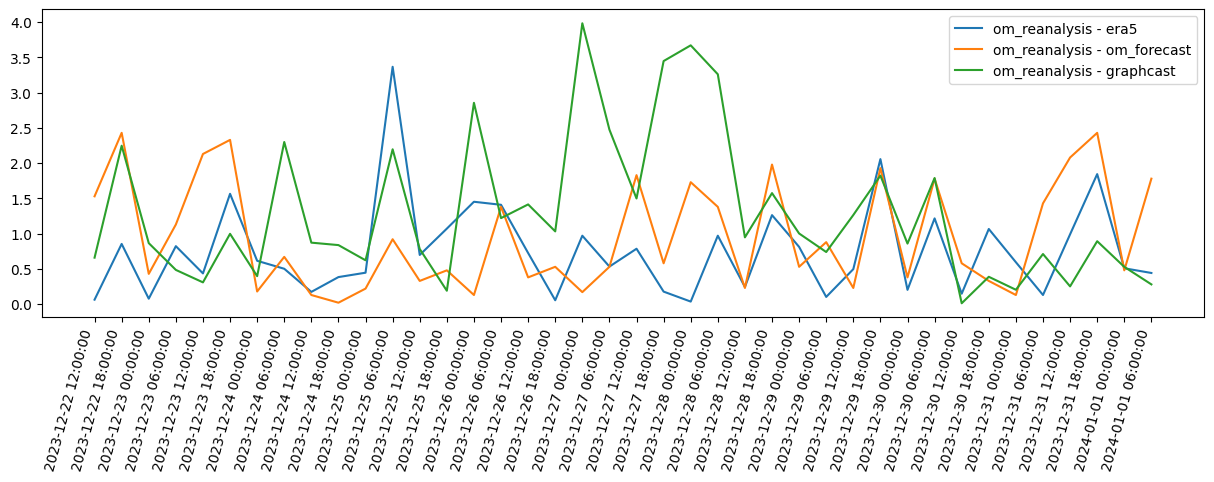

In [7]:
plt.figure(figsize=(15,4))
plt.plot(df['date'], abs(df['temperature_2m_reanalysis'] - df['era5_2m']))
plt.plot(df['date'], abs(df['temperature_2m_reanalysis'] - df['temperature_2m_forcast']))
plt.plot(df['date'], abs(df['temperature_2m_reanalysis'] - df['gc_2m']))

plt.xticks(rotation=75, ha='right')
plt.legend(['om_reanalysis - era5', 'om_reanalysis - om_forecast', 'om_reanalysis - graphcast'])

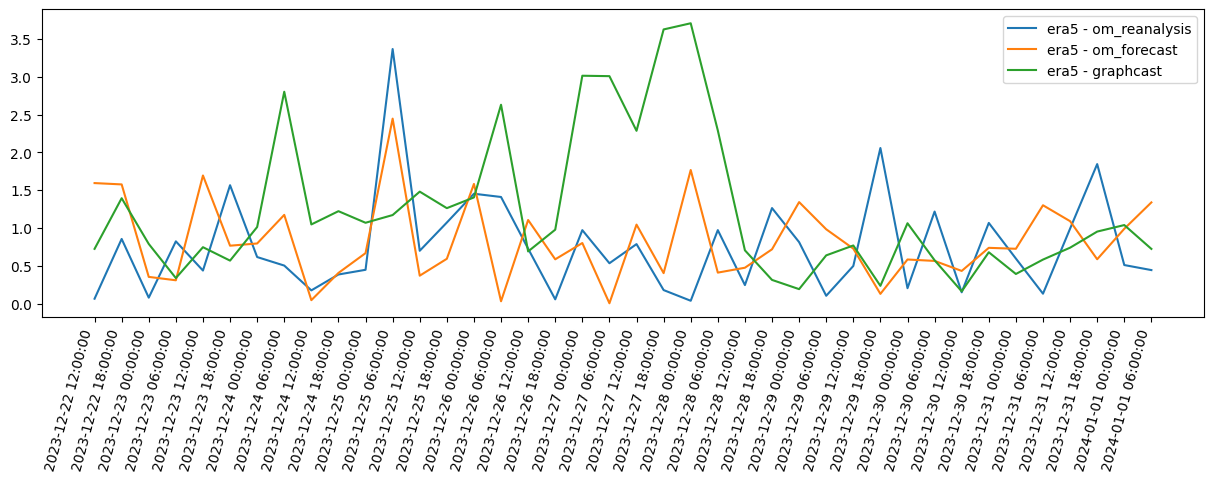

In [8]:
plt.figure(figsize=(15,4))
plt.plot(df['date'], abs(df['era5_2m'] - df['temperature_2m_reanalysis']))
plt.plot(df['date'], abs(df['era5_2m'] - df['temperature_2m_forcast']))
plt.plot(df['date'], abs(df['era5_2m'] - df['gc_2m']))

plt.xticks(rotation=75, ha='right')
plt.legend(['era5 - om_reanalysis', 'era5 - om_forecast', 'era5 - graphcast'])

Text(0.5, 1.0, 'Mean Delta vs om Reanalysis')

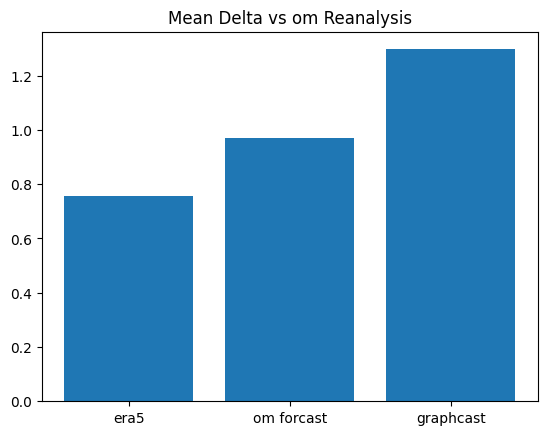

In [9]:
plt.bar(['era5', 'om forcast', 'graphcast'], [
    abs(df['temperature_2m_reanalysis'] - df['era5_2m']).mean(), 
    abs(df['temperature_2m_reanalysis'] - df['temperature_2m_forcast']).mean(), 
    abs(df['temperature_2m_reanalysis'] - df['gc_2m']).mean()
])
plt.title('Mean Delta vs om Reanalysis')

Text(0.5, 1.0, 'Mean Delta vs om Reanalysis')

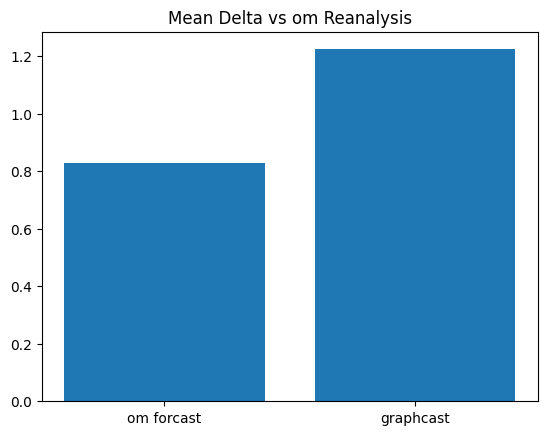

In [10]:
plt.bar(['om forcast', 'graphcast'], [
    abs(df['era5_2m'] - df['temperature_2m_forcast']).mean(),
    abs(df['era5_2m'] - df['gc_2m']).mean()
])
plt.title('Mean Delta vs om Reanalysis')
